In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

In [4]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
species=LabelEncoder()
species.fit(iris_df['species'])
names=species.classes_

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [18]:
x_data=iris_df[iris_df.columns[0:4]]

y_data=species.fit_transform(iris_df['species'])

In [25]:
s1=iris_df[iris_df.species=='Iris-setosa']
s2=iris_df[iris_df.species=='Iris-versicolor']
s3=iris_df[iris_df.species=='Iris-virginica']

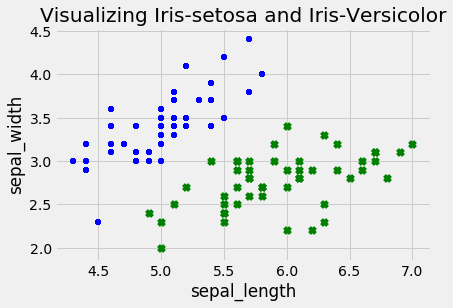

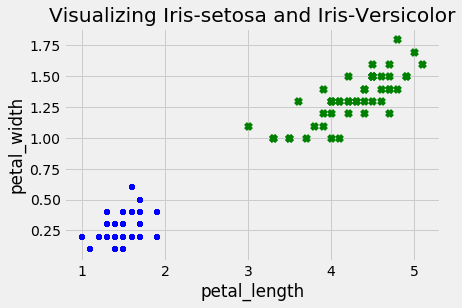

In [49]:
plt.title('Visualizing Iris-setosa and Iris-Versicolor')
plt.style.use('fivethirtyeight')
plt.scatter(s1['sepal_length'],s1['sepal_width'],marker='+',color='b')
plt.scatter(s2['sepal_length'],s2['sepal_width'],marker='x',color='g')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

plt.title('Visualizing Iris-setosa and Iris-Versicolor')
plt.style.use('fivethirtyeight')
plt.scatter(s1['petal_length'],s1['petal_width'],marker='+',color='b')
plt.scatter(s2['petal_length'],s2['petal_width'],marker='x',color='g')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

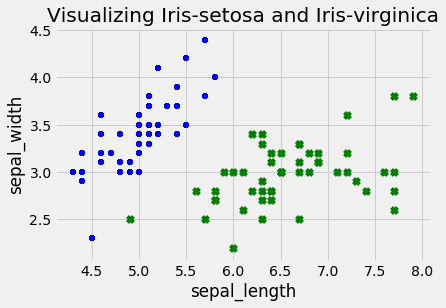

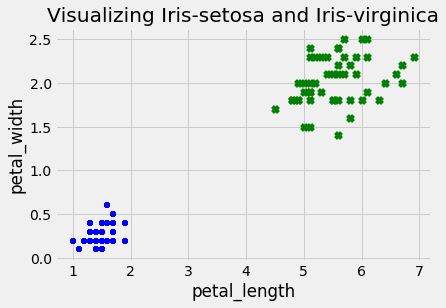

In [52]:
plt.title('Visualizing Iris-setosa and Iris-virginica')
plt.style.use('fivethirtyeight')
plt.scatter(s1['sepal_length'],s1['sepal_width'],marker='+',color='b')
plt.scatter(s3['sepal_length'],s3['sepal_width'],marker='x',color='g')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

plt.title('Visualizing Iris-setosa and Iris-virginica')
plt.style.use('fivethirtyeight')
plt.scatter(s1['petal_length'],s1['petal_width'],marker='+',color='b')
plt.scatter(s3['petal_length'],s3['petal_width'],marker='x',color='g')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20)

In [87]:
print(len(x_train)==len(y_train))
print(len(x_test)==len(y_test))

True
True


In [88]:
print("X train shape: ",x_train.shape)
print("Y train shape: ",y_train.shape)
print("X test shape: ",x_test.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (120, 4)
Y train shape:  (120,)
X test shape:  (30, 4)
Y test shape:  (30,)


In [97]:
model=SVC(gamma='auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [126]:
pred=model.predict(x_test)
pred
for i in range(len(pred)):
    print('Data:')
    print(x_test.iloc[i])
    print('\nActual:',names[y_test[i]],'Predicted:',names[pred[i]])
    print('\n\n')

Data:
sepal_length    6.1
sepal_width     2.6
petal_length    5.6
petal_width     1.4
Name: 134, dtype: float64

Actual: Iris-virginica Predicted: Iris-virginica



Data:
sepal_length    6.3
sepal_width     3.3
petal_length    4.7
petal_width     1.6
Name: 56, dtype: float64

Actual: Iris-versicolor Predicted: Iris-versicolor



Data:
sepal_length    4.6
sepal_width     3.4
petal_length    1.4
petal_width     0.3
Name: 6, dtype: float64

Actual: Iris-setosa Predicted: Iris-setosa



Data:
sepal_length    5.1
sepal_width     3.3
petal_length    1.7
petal_width     0.5
Name: 23, dtype: float64

Actual: Iris-setosa Predicted: Iris-setosa



Data:
sepal_length    6.4
sepal_width     3.2
petal_length    5.3
petal_width     2.3
Name: 115, dtype: float64

Actual: Iris-virginica Predicted: Iris-virginica



Data:
sepal_length    5.0
sepal_width     3.3
petal_length    1.4
petal_width     0.2
Name: 49, dtype: float64

Actual: Iris-setosa Predicted: Iris-setosa



Data:
sepal_length    7.2
sepal

In [128]:
joblib.dump(model,'iris_model')

['iris_model']

In [136]:
mj=joblib.load('iris_model')
p=mj.predict([[5.5,2.4,3.8,1.1]])
names[p[0]]

'Iris-versicolor'